<a href="https://colab.research.google.com/github/rootUJ99/hf_transformer_diffusers/blob/main/transformer_preprocessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install transformers datasets datasets[audio] torch torchvision Pillow matplotlib


In [56]:
import pprint
from transformers import AutoTokenizer
pp = pprint.PrettyPrinter(indent=2, width=100, compact=True)
pprint = pp.pprint

#### Tokenization

In [57]:

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_input = tokenizer("between me and you this colab sucks, i wish i had remote access to it and i can use my vscode")
pprint(tokenized_input)

{ 'attention_mask': [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1],
  'input_ids': [ 101, 1206, 1143, 1105, 1128, 1142, 1884, 1742, 1830, 22797, 117, 178, 3683, 178,
                 1125, 6456, 2469, 1106, 1122, 1105, 178, 1169, 1329, 1139, 5016, 13775, 102],
  'token_type_ids': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0]}


In [58]:
tokenizer.decode(tokenized_input["input_ids"])

'[CLS] between me and you this colab sucks, i wish i had remote access to it and i can use my vscode [SEP]'

In [59]:
batch_input = [
    "im in love with this monitoe",
    "i feel like buying another one",
    "is it okay though",
    "this",
    "so this is a long sentense, yeah it is long longer than anything you will come acrosss this is freakingly long, long long and long, longer than anything which you will every see in this life"
]

tokenized_input = tokenizer(batch_input, padding=True, truncation=True, return_tensors="pt")

pprint(tokenized_input)
for sen in tokenized_input['input_ids']:
  decoded = tokenizer.decode(sen)
  pprint(decoded)

{ 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
  'input_ids': tensor([[  101, 13280,  1107,  1567,  1114,  1142, 19863,  8383,  1162,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,

###Feature Extractor (Audio)

In [68]:
from datasets import load_dataset, Audio
dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

pprint(dataset)
pprint(dataset[0]["audio"])


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})
{ 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
        0.        ,  0.        ]),
  'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'sampling_rate': 8000}


In [70]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))
pprint(dataset[0]["audio"])

{ 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
        3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
  'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
  'sampling_rate': 16000}


In [71]:
from transformers import AutoFeatureExtractor
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [88]:
audio_input = [dataset[i]["audio"]["array"] for i in range(5)]
pprint(audio_input)

feature_extractor(audio_input, sampling_rate=16_000)
pprint(feature_extractor)


[ array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
        3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
  array([-1.40285119e-05,  1.31274341e-04,  2.59695575e-04, ...,
        1.30564310e-02,  1.11398110e-02,  5.69025241e-03]),
  array([-2.16008630e-06,  1.90037536e-05,  3.14362114e-06, ...,
        8.02096620e-04,  9.22182924e-04,  5.89025032e-04]),
  array([ 2.22060946e-04,  1.51066808e-04,  2.29590805e-05, ...,
       -1.76095316e-04, -2.53347447e-04, -1.42837933e-04]),
  array([-2.41687987e-04, -1.11320842e-04, -9.40184691e-07, ...,
        3.21325671e-04,  2.63941009e-04,  9.93684807e-05])]
Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}



In [93]:
pprint(dataset[0]["audio"]["array"].shape)
pprint(dataset[1]["audio"]["array"].shape)

(173398,)
(106496,)


In [95]:
def preprocessor_function(example):
  audio_arr = [aud["array"] for aud in example["audio"]]
  inputs = feature_extractor(
      audio_arr,
      sampling_rate=16_000,
      padding=True,
      max_length=100000,
      truncation=True,
  )
  return inputs


In [97]:
preprocessed_dataset = preprocessor_function(dataset[:5])

In [99]:
pprint(preprocessed_dataset["input_values"][0].shape)
pprint(preprocessed_dataset["input_values"][1].shape)

(100000,)
(100000,)


###Computer vision

Dataset({
    features: ['image', 'label'],
    num_rows: 100
})


AttributeError: ignored

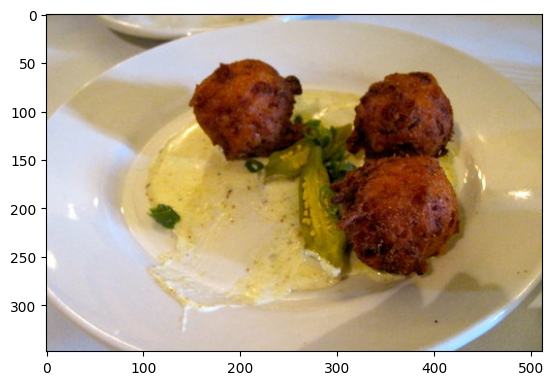

In [130]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
dataset = load_dataset("food101", split="train[:100]")

pprint(dataset)
# _, axarr = plt.subplots(1, 4)

plt.imshow(dataset[3]["image"])


In [103]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

In [128]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transform = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

In [143]:
def transformers(example):
  images = [_transform(img.convert("RGB")) for img in example["image"]]
  example["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
  return example



In [144]:
dataset.set_transform(transformers)

In [145]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

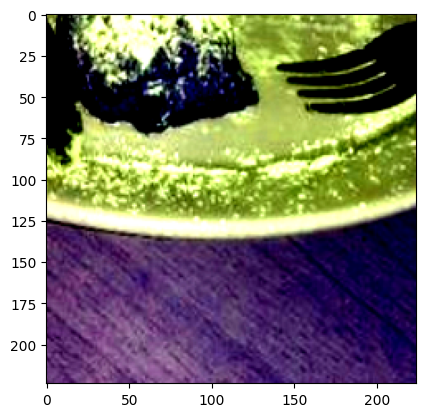

In [154]:
import numpy as np
img  =dataset[0]["pixel_values"]
plt.imshow(img.permute(1,2,0))